In [2]:
import numpy as np
from scipy import linalg

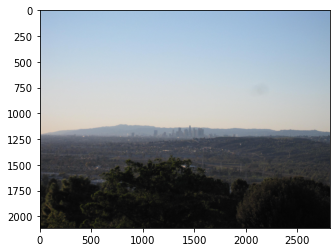

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data
from skimage import exposure
from skimage import filters
from skimage.exposure import match_histograms

img=mpimg.imread('city.jpg')
plt.imshow(img)

In [4]:
img.shape

(2112, 2816, 3)

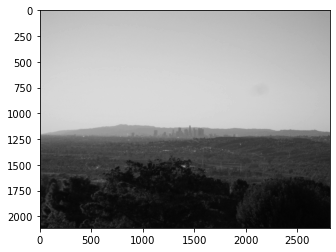

In [6]:
img_array = img / 255
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
plt.imshow(img_gray, cmap="gray")

In [7]:
img_gray.shape

(2112, 2816)

In [8]:
mpimg.imsave('city_gray.jpg',img_gray)

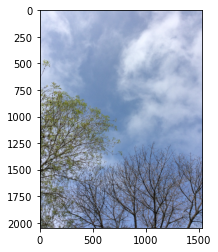

In [37]:
reference = mpimg.imread('cloud.jpg')
img = mpimg.imread('city.jpg')
plt.imshow(reference)

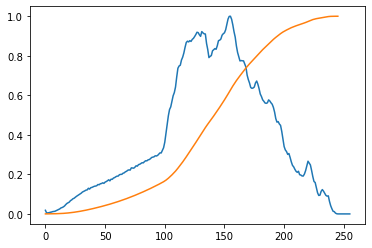

In [38]:
ref_hist, bins = exposure.histogram(reference[..., 0], source_range='dtype')
plt.plot(bins, ref_hist / ref_hist.max())
ref_cdf, bins = exposure.cumulative_distribution(reference[..., 0])
plt.plot(bins, ref_cdf)

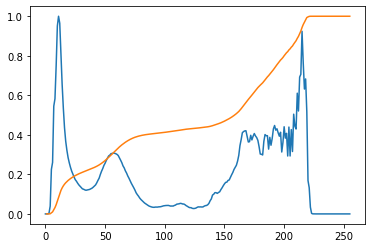

In [39]:
img_hist, bins = exposure.histogram(img[..., 0], source_range='dtype')
plt.plot(bins, img_hist / img_hist.max())
img_cdf, bins = exposure.cumulative_distribution(img[..., 0])
plt.plot(bins, img_cdf)

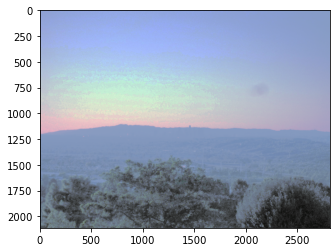

In [40]:
matched = match_histograms(img, reference, multichannel=True)
plt.imshow(matched)

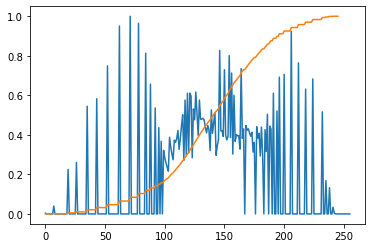

In [41]:
mat_hist, bins = exposure.histogram(matched[..., 0], source_range='dtype')
plt.plot(bins, mat_hist / mat_hist.max())
mat_cdf, bins = exposure.cumulative_distribution(matched[..., 0])
plt.plot(bins, mat_cdf)

In [36]:
mpimg.imsave('cloud_city.jpg', matched)